In [1]:
# Corbin Graham
# MATH 535 Homework 1

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, util
import copy

In [124]:
# Necessary Functions for saving and displaying images

# Save image to file using spatial domain format (png)
def save_image(img, location="output.png"):
  location = "/content/" + location # ***REMOVE THIS IF YOU ARE NOT USING COLAB***
  io.imsave(location, img)
  print("Image saved as:", location)

# Print image to screen
#   - bw (Black & White Option)
#   - title (Title to print)
def display_image(img, bw=False, title=""):
  if(bw): plt.imshow(img, cmap=plt.cm.gray)
  else: plt.imshow(img)
  plt.title(title)
  plt.show()

def bitget(img, bit):
  return np.unpackbits(img)[:,bit]

def bitplane(img, plane):
  return img & plane

# Examples (testing)
# display_image(img, title="Color")
# display_image(img_bw, bw=True)
# img_bw

# Problem 1: implement LSB replacement on a single image.
---
In this problem, your goal is to write code that creates a stego image by embedding a randomly generated message bitstream into a cover image, 
then extracts the message from the stego image. 

In [122]:
# Import provided image as img
img_location = "/content/265701.JPG" # Change this location to where your image is stored
                                             #  I uploaded the image to Colab and this is its temp location
img = io.imread(img_location)

#Save the image in a spacial domain format
save_image(util.img_as_ubyte(img), location="original.png")

# Set the random seed for numpy for replication
np.random.seed(0)

Image saved as: /content/original.png


In [125]:
# Create bw image
img_bw = color.rgb2gray(img)

# Reshape (resize with aliasing)
img_bw = transform.resize(img_bw, (1024, 1024), anti_aliasing=False)

# Normalize the b&w image
img_bw = util.img_as_ubyte(img_bw)

# Save gray scale cover image in spatial domain format
save_image(util.img_as_ubyte(img_bw), location="cover.png")

Image saved as: /content/cover.png


In [350]:
def get_size(img):
  print(img.shape)
  (M,N) = img.shape
  return (M,N)

def get_payload(img, rate):
  (M,N) = get_size(img)
  capacity = np.ceil(np.log2(M*N))
  K = int(rate * (M*N - capacity))
  payload = np.random.randint(2, size=K)
  return payload

def msg_diff(cover,stego):
  M,N = get_size(cover)
  size = M*N
  cover = cover.reshape(-1)
  stego = stego.reshape(-1)
  diff = 0
  for i,o in enumerate(cover):
    # print(o, stego[i])
    if o != stego[i]: diff += 1
  return (diff / size) / 100

# def embed_multiple(images):
#   for img in images:
#     img = embed(img)
#   return images

In [231]:

# img_stego = embed(img_bw, payload)
# save_image(img_stego)

# # Normalize img_bw
# # img_bw = util.img_as_ubyte(img_bw)

# msg = get_message(img_bw, img_stego, payload)
# print(payload, msg)
# payload_rate = len(payload) / (1024*1024)
# msg_rate = len(msg) / (1024*1024)
# payload_rate, msg_rate, len(payload)

(1024, 1024)
104855 17 11001100110010111 104855
20.0
Image saved as: /content/output.png
[1 0 0 ... 1 0 0] [205 200 204 ...  60  64  58]


(0.09999752044677734, 0.09999752044677734, 104855)

## Problem 1: Output
---

In [310]:
def embed(img, payload):
  M,N = get_size(img)

  K = len(payload)
  t = int(np.ceil(np.log2(M*N)))
  img_dst = copy.deepcopy(img)

  kb = np.binary_repr(K, width=t)
  # print("Len (msg, img):", int(kb,2), M*N)

  tmp = img_dst.reshape(-1)
  h = 0

  # Embed K with t-bits
  for i in range(t):
    lsb = np.binary_repr(tmp[i], width=8)
    lsb = lsb[:-1] + kb[i]
    tmp[i] = int(lsb,2)
    h = i + 1

  # Embed Message Bits
  for i,p in enumerate(payload):
    i = i + h
    lsb = np.binary_repr(tmp[i], width=8)
    lsb = lsb[:-1] + str(p)
    # print(tmp[i])
    tmp[i] = int(lsb,2)
    # print(tmp[i])
    # print()

  img_dst = tmp.reshape(*img_dst.shape)
  return img_dst

In [351]:
rate = 0.1
payload = get_payload(img_bw, rate)
img_stego = embed(img_bw, payload)
save_image(img_stego, location="stego.png")

(1024, 1024)
(1024, 1024)
Image saved as: /content/stego.png


In [326]:
def get_message(stego):
  M,N = get_size(stego)

  stego = stego.reshape(-1)
  t = int(np.ceil(np.log2(M*N)))
  K = ""
  for i in range(t):
    lsb = np.binary_repr(stego[i], width=8)
    K += lsb[-1:]
  K = int(K,2)

  msg = ""
  for i in range(K):
    i = i + t
    lsb = np.binary_repr(stego[i], width=8)
    msg += lsb[-1:]

  return np.array(list(msg))

msg = get_message(img_stego)
payload_str = "".join(str(e) for e in payload)
msg_str = "".join(str(e) for e in msg)
# Verify the messages match
payload_str == msg_str

(1024, 1024)


True

(1024, 1024)
The pixel dimension of the images used in Problem 1 are (1024, 1024)
The number of bits embedded is 10% of M*N: 104855


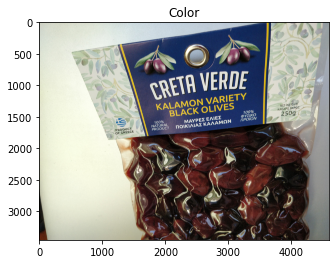

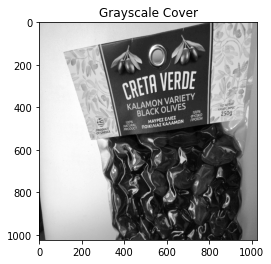

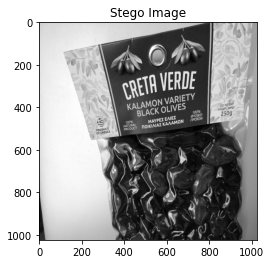

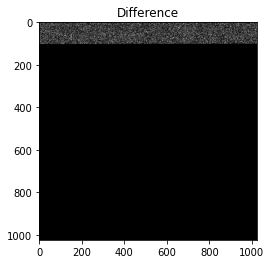

(1024, 1024)
Percentage Difference: 0.05%


In [349]:
# Printouts

# 1. Pixel Dimensions
print("The pixel dimension of the images used in Problem 1 are", get_size(img_bw))
# 2. Length of message bitstream
print("The number of bits embedded is 10% of M*N:", len(payload))
# 3. Display (3) Images, Color, Cover, Stego
display_image(img, title="Color"); display_image(img_bw, bw=True, title="Grayscale Cover"); display_image(img_stego, bw=True, title="Stego Image")
# 4. Difference between cover and stego
difference=img_bw-img_stego; display_image(difference, bw=True, title="Difference")
# 5. Percentage calculated between the embedded and extracted message
calc=msg_diff(img_cover,img_stego)
print(f"Percentage Difference: {calc:.2%}")